In [1]:
from network import *
import sys
from inference_symmetric import *
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
T,N = 100,50
symmetric=True

network = Network(N=N, dirichlet=0.5)

A0 = network.generate_A0(T=T, avg_degree=100, symmetric=symmetric)
for t in range(T): 
    assert(np.all(A0[t] == A0[t].T))

In [3]:
u, w = network.get_u(), network.get_w()

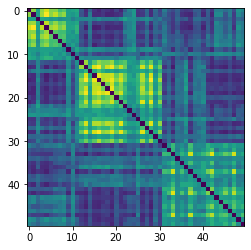

In [4]:
plt.imshow(A0.sum(axis=0))

In [5]:
seeds = [697752728, 4190089612, 1176914559, 3077924848, 315917623, 2544020234, 1077758578, 4071300106, 534591752, 3553386411]

## NoExp Inference_symmetric

In [6]:
import inference

## true affinity matrix

In [7]:
for seed in seeds: 
    losses_noexp, theta_noexp = inference.fit_noexp(A0, 3, seed=seed, symmetric=True, true_w=w)
    u_noexp, v_noexp, w_noexp = theta_noexp
    acc_u, acc_v = evaluate_memberships(u, u_noexp, u, u_noexp, verbose=False)[0:2]
    print_bold(f"seed={seed}: acc_u={acc_u}, acc_v={acc_v}")

running NoExp inference for 5000 iterations: 

No exposure inference with T=100, N=50, K=3 and 5000 iterations took 2.650506225000754 seconds

seed=697752728: acc_u=0.9997158993793741, acc_v=0.9997158993793741
running NoExp inference for 5000 iterations: 

No exposure inference with T=100, N=50, K=3 and 5000 iterations took 2.681505733999984 seconds

seed=4190089612: acc_u=0.9997253936492541, acc_v=0.9997253936492541
running NoExp inference for 5000 iterations: 

No exposure inference with T=100, N=50, K=3 and 5000 iterations took 2.636811057000159 seconds

seed=1176914559: acc_u=0.9996762789134246, acc_v=0.9996762789134246
running NoExp inference for 5000 iterations: 

No exposure inference with T=100, N=50, K=3 and 5000 iterations took 2.646814784000526 seconds

seed=3077924848: acc_u=0.9997254139703386, acc_v=0.9997254139703386
running NoExp inference for 5000 iterations: 

No exposure inference with T=100, N=50, K=3 and 5000 iterations took 2.631041794000339 seconds

seed=315917623

## true initial affinity matrix with random noise

In [8]:
random_noise = np.random.uniform(low=0, high=1e-2, size=(3,3))

In [9]:
for seed in seeds: 
    losses_noexp, theta_noexp = inference.fit_noexp(A0, 3, seed=seed, symmetric=True, initial_w=w+random_noise)
    u_noexp, v_noexp, w_noexp = theta_noexp
    acc_u, acc_v = evaluate_memberships(u, u_noexp, u, u_noexp, verbose=False)[0:2]
    print_bold(f"seed={seed}: acc_u={acc_u}, acc_v={acc_v}")

running NoExp inference for 5000 iterations: 

No exposure inference with T=100, N=50, K=3 and 5000 iterations took 4.279428025000016 seconds

seed=697752728: acc_u=0.9982192589275242, acc_v=0.9982192589275242
running NoExp inference for 5000 iterations: 

No exposure inference with T=100, N=50, K=3 and 5000 iterations took 4.300974638999833 seconds

seed=4190089612: acc_u=0.9985739161777384, acc_v=0.9985739161777384
running NoExp inference for 5000 iterations: 

No exposure inference with T=100, N=50, K=3 and 5000 iterations took 4.375595221000367 seconds

seed=1176914559: acc_u=0.9969055233447821, acc_v=0.9969055233447821
running NoExp inference for 5000 iterations: 

No exposure inference with T=100, N=50, K=3 and 5000 iterations took 4.274513689000742 seconds

seed=3077924848: acc_u=0.997616568306555, acc_v=0.997616568306555
running NoExp inference for 5000 iterations: 

No exposure inference with T=100, N=50, K=3 and 5000 iterations took 4.2926338080005735 seconds

seed=315917623:

## Investigating seed 1176914559

running NoExp inference for 5000 iterations: 

No exposure inference with T=100, N=50, K=3 and 5000 iterations took 4.472114023999893 seconds

[[ 0.6  7.8 21.3]
 [ 7.8  0.  13.8]
 [21.3 13.8  7.8]]
(50, 3)
seed=1176914559: acc_u=0.6935716359521084, acc_v=0.6935716359521084


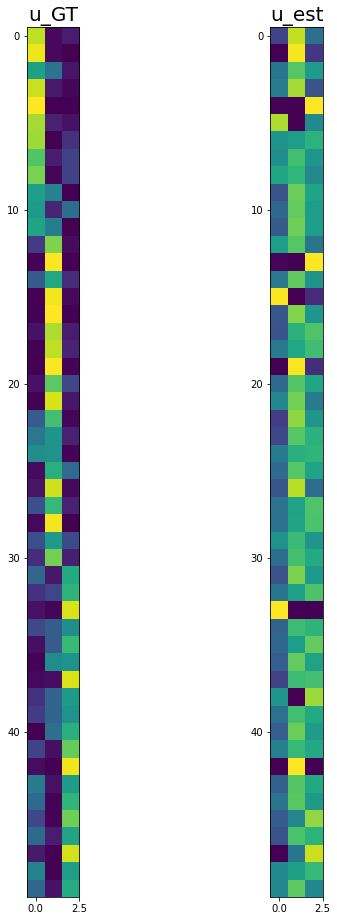

In [11]:
from sklearn.preprocessing import normalize

seed = 1176914559

losses_noexp, theta_noexp = inference.fit_noexp(A0, 3, seed=seed, symmetric=True)
u_noexp, v_noexp, w_noexp = theta_noexp
print(np.round(w_noexp,4) * 1000)

fig, axs = plt.subplots(1,2, figsize=(8,16))
u_perm = permute_memberships(u, u_noexp, u, u_noexp)[0]
print(u_perm.shape)
axs[0].imshow(u)
axs[1].imshow(u_perm)
axs[0].set_title("u_GT", fontsize=20)
axs[1].set_title("u_est", fontsize=20)
acc_u, acc_v = evaluate_memberships(u, u_noexp, u, u_noexp, verbose=False)[0:2]
print_bold(f"seed={seed}: acc_u={acc_u}, acc_v={acc_v}")

running NoExp inference for 5000 iterations: 

No exposure inference with T=100, N=50, K=3 and 5000 iterations took 6.804999490001137 seconds

[[3030.8  156.5  316.6]
 [ 189.9 2108.5  334.7]
 [ 417.4  406.9 5948.3]]
(50, 3)
seed=1176914559: acc_u=0.987055352497203, acc_v=0.9942840337213302


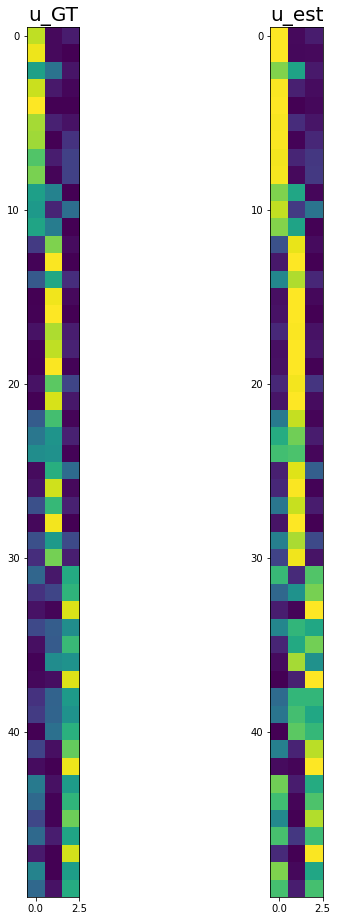

In [12]:
from sklearn.preprocessing import normalize

seed = 1176914559

losses_exp, theta_exp = inference.fit_noexp(A0, 3, seed=seed, symmetric=False)
u_exp, v_exp, w_exp = theta_exp
print(np.round(w_exp,4) * 1000)

fig, axs = plt.subplots(1,2, figsize=(8,16))
u_perm = permute_memberships(u, u_exp, u, u_exp)[0]
print(u_perm.shape)
axs[0].imshow(u)
axs[1].imshow(u_perm)
axs[0].set_title("u_GT", fontsize=20)
axs[1].set_title("u_est", fontsize=20)
acc_u, acc_v = evaluate_memberships(u, u_exp, u, v_exp, verbose=False)[0:2]
print_bold(f"seed={seed}: acc_u={acc_u}, acc_v={acc_v}")

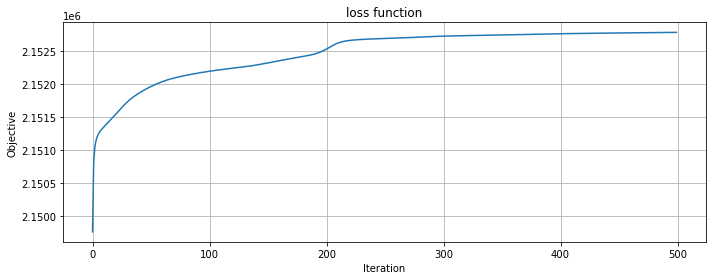

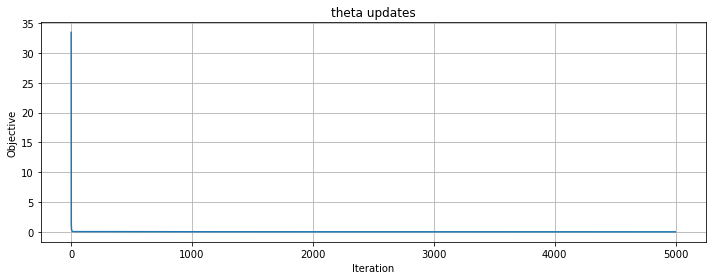

In [13]:
plot_losses(losses_noexp[0], title="loss function")
plot_losses(losses_noexp[1], title="theta updates")